In [30]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.cluster import KMeans


def compute_weight_matrix(X, k):
    weight_matrix = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        distances = np.linalg.norm(X - X[i], axis=1)
        sorted_indices = np.argsort(distances)
        k_nearest_indices = sorted_indices[1:k+1]  # Exclude self
        weight_matrix[i, k_nearest_indices] = distances[k_nearest_indices]
    return weight_matrix

def compute_laplacian(weight_matrix):
    degree_matrix = np.diag(np.sum(weight_matrix, axis=1))
    laplacian_matrix = degree_matrix - weight_matrix            #unnormalized laplacian
    return laplacian_matrix

def compute_eigenvalues(laplacian_matrix, k):
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
    return eigenvalues, eigenvectors

def compute_eigenvectors(eigenvalues, eigenvectors, k):
    sorted_indices = np.argsort(eigenvalues)
    return eigenvectors[:, sorted_indices[1:k+1]]

def compute_kmeans(eigenvectors, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(eigenvectors)
    return kmeans.labels_


class mySpectralClustering:
    def __init__(self, k, n_neighbors):
        self.k = k
        self.n_neighbors = n_neighbors
        self.weight_matrix = None
        self.laplacian_matrix = None
        self.eigenvectors = None
        self.labels = None

    def fit(self, X):
        self.weight_matrix = compute_weight_matrix(X, self.n_neighbors)
        self.laplacian_matrix = compute_laplacian(self.weight_matrix)
        eigenvalues, eigenvectors = compute_eigenvalues(self.laplacian_matrix, self.k)
        self.eigenvectors = compute_eigenvectors(eigenvalues, eigenvectors, self.k)
        self.labels = compute_kmeans(self.eigenvectors, self.k)

    def predict(self, X):
        weight_matrix = compute_weight_matrix(X, self.n_neighbors)
        laplacian_matrix = compute_laplacian(weight_matrix)
        eigenvalues, eigenvectors = compute_eigenvalues(laplacian_matrix, self.k)
        eigenvectors = compute_eigenvectors(eigenvalues, eigenvectors, self.k)
        labels = compute_kmeans(eigenvectors, self.k)
        return labels



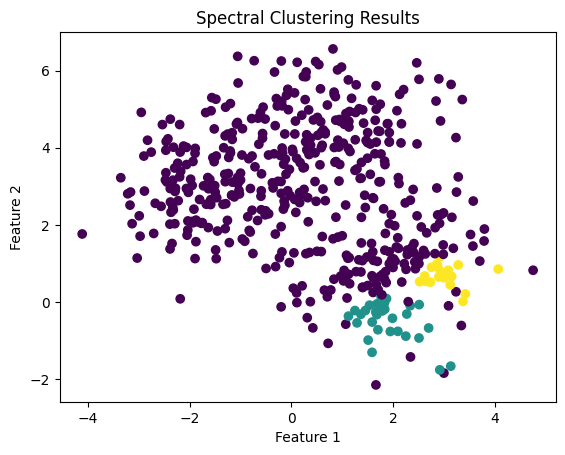

In [31]:
import numpy as np
from sklearn.datasets import make_blobs

# Generate a dataset
X, y = make_blobs(n_samples=500, centers=3, random_state=0)

# Create an instance of mySpectralClustering
spectral_clustering = mySpectralClustering(k=3, n_neighbors=10)

# Fit the mySpectralClustering instance to the dataset
spectral_clustering.fit(X)

# Predict the labels for the dataset
labels = spectral_clustering.predict(X)

# Plot the dataset with different colors representing the predicted labels
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spectral Clustering Results')
plt.show()



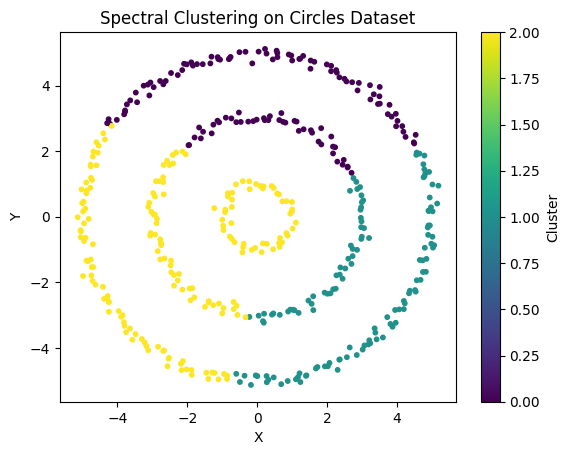

In [32]:

# copying circle dataset from hw1
circle = lambda x, y, stddev, radius, n_samples: [
    (
        x + radius * math.cos(2 * math.pi * i / n_samples) + np.random.normal(0, stddev),
        y + radius * math.sin(2 * math.pi * i / n_samples) + np.random.normal(0, stddev)
    )
    for i in range(n_samples)
]
circles_dataset = sum((circle(0, 0, 0.1, radius, radius * 50) for radius in [1, 3, 5]), start=[])
circles_data = np.array(circles_dataset)

# Create an instance of mySpectralClustering
spectral_clustering = mySpectralClustering(k=3, n_neighbors=30)

# Fit the mySpectralClustering instance to the circles dataset
spectral_clustering.fit(circles_data)

# Predict the labels for the circles dataset
clusters = spectral_clustering.predict(circles_data)

# Plot the circles dataset with different colors representing the predicted clusters
plt.scatter(circles_data[:, 0], circles_data[:, 1], c=clusters, cmap='viridis', s=10)
plt.title('Spectral Clustering on Circles Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster')
plt.show()


In [33]:
import time
from sklearn.cluster import SpectralClustering

# Create an instance of mySpectralClustering
my_spectral_clustering = mySpectralClustering(k=3, n_neighbors=20)

# Create an instance of SpectralClustering from sklearn
sklearn_spectral_clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=20)

# Time the runtime of mySpectralClustering
start_time = time.time()
my_spectral_clustering.fit(X)
end_time = time.time()
my_spectral_clustering_runtime = end_time - start_time

# Time the runtime of SpectralClustering from sklearn
start_time = time.time()
sklearn_spectral_clustering.fit(X)
end_time = time.time()
sklearn_spectral_clustering_runtime = end_time - start_time

print("Runtime of mySpectralClustering:", my_spectral_clustering_runtime)
print("Runtime of SpectralClustering from sklearn:", sklearn_spectral_clustering_runtime)


Runtime of mySpectralClustering: 0.09649157524108887
Runtime of SpectralClustering from sklearn: 0.05451321601867676
